<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/Copy_of_Posture_Corrector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf. version )

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_path = "/content/data"

# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    batch_size=30,
    image_size=(32, 32),
    shuffle=True
)

dataset_size = len(dataset)  # Get the total number of batches
train_size = int(0.8 * dataset_size)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

def dataset_to_numpy(dataset):
    images, labels = [], []
    for image_batch, label_batch in dataset:
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())
    return np.array(images), np.array(labels)

training_images, training_labels = dataset_to_numpy(train_dataset)
test_images, test_labels = dataset_to_numpy(test_dataset)

# Check the shapes
print("Training data shape:", training_images.shape, training_labels.shape)
print("Test data shape:", test_images.shape, test_labels.shape)

Found 344 files belonging to 2 classes.
Training data shape: (270, 32, 32, 3) (270,)
Test data shape: (74, 32, 32, 3) (74,)


In [ ]:
training_images, test_images = training_images/255.0, test_images/255.0
print(training_images.shape)

(270, 32, 32, 3)


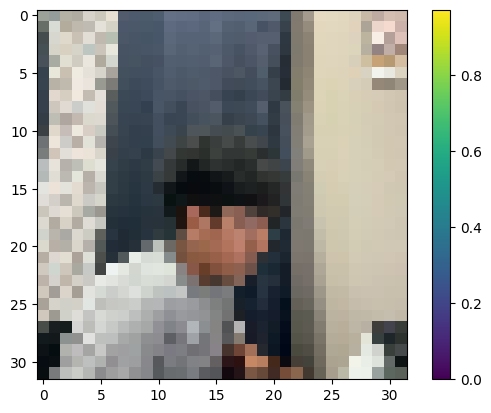

In [ ]:
# plotting image number 9 from test set
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

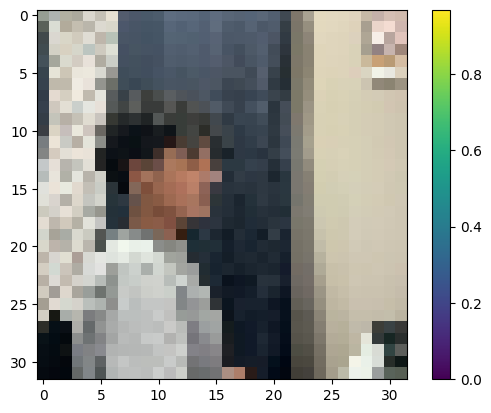

In [ ]:
plt.figure()
plt.imshow(test_images[50])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(270, 32, 32, 3, 1)


In [ ]:
output_classes = len(np.unique(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  2


In [ ]:
input_layer = Input(shape = (32,32, 3))
conv1 = Conv2D(16, (3,3), strides = 2, activation= 'relu') (input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu') (maxpool1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(128, activation = 'relu')(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)
model = Model(input_layer, output_layer)

In [ ]:
#compiling the CNN model
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
#training the CNN model
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images,test_labels), verbose=1)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6733 - loss: 0.6445 - val_accuracy: 1.0000 - val_loss: 0.4436
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9872 - loss: 0.3884 - val_accuracy: 1.0000 - val_loss: 0.1606
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9965 - loss: 0.1354 - val_accuracy: 1.0000 - val_loss: 0.0310
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9867 - loss: 0.0378 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 9.5187e-04
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 7.2

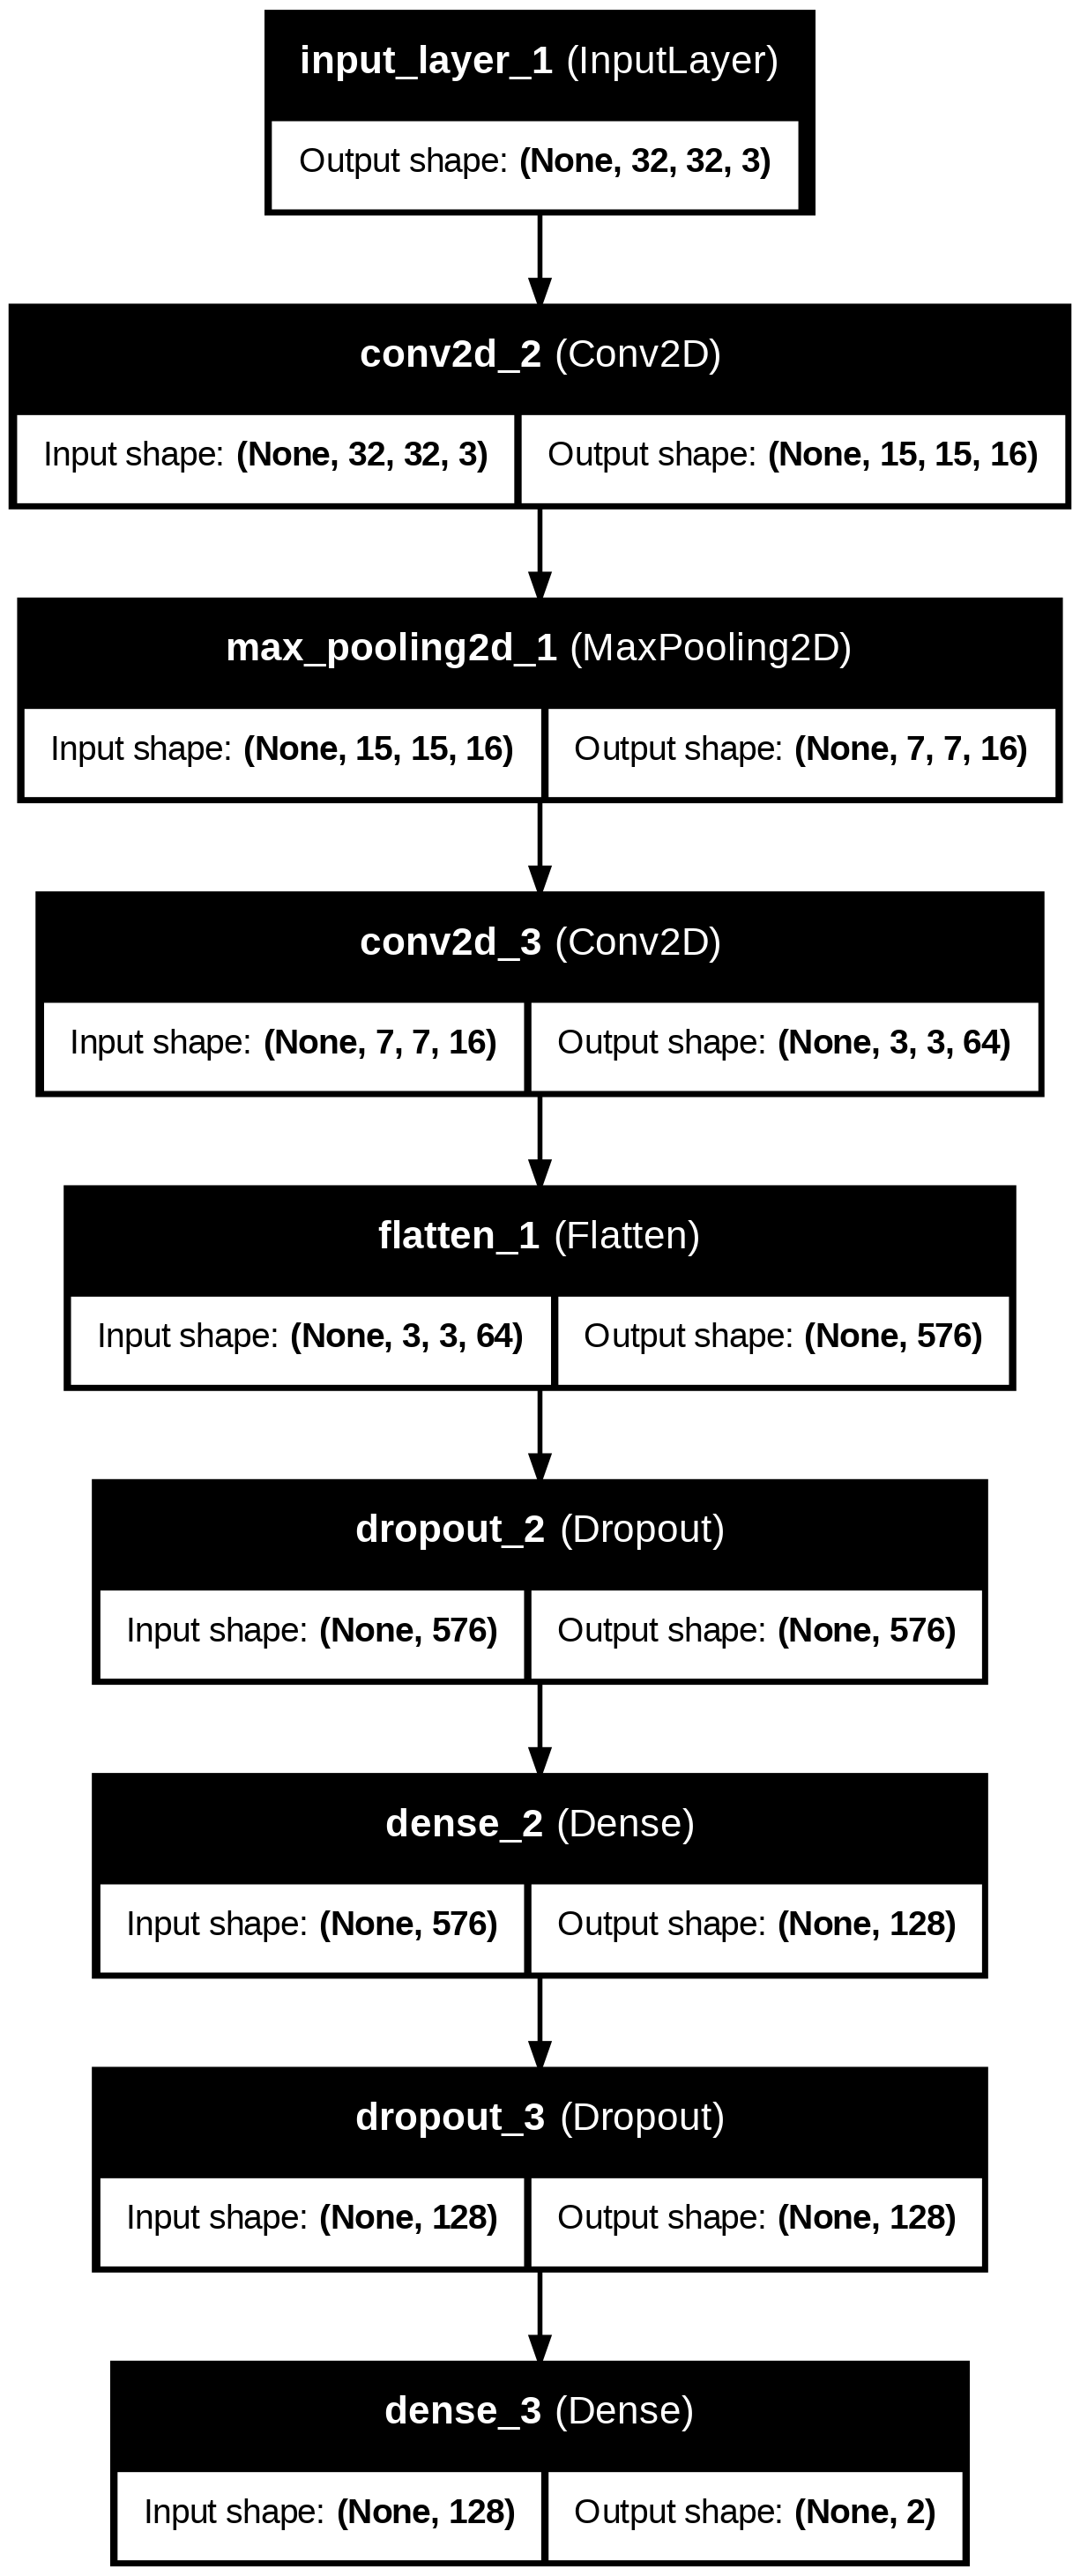

In [ ]:
#compiling the CNN model
model.compile(optimizer = 'adam', loss=
'sparse_categorical_crossentropy', metrics =['accuracy'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png',
show_shapes=True, show_layer_names=True)

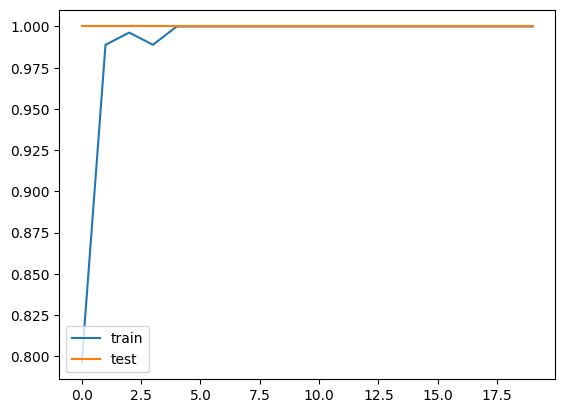

In [ ]:
#plotting accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train','test'], loc='lower left')

In [ ]:
#making predictions on a single image
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)
print(test_labels[9])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
0
0


In [ ]:
# Another Prediction(image in earlier segment)
prediction = np.argmax(output[50])
print(prediction)
print(test_labels[50])

1
1


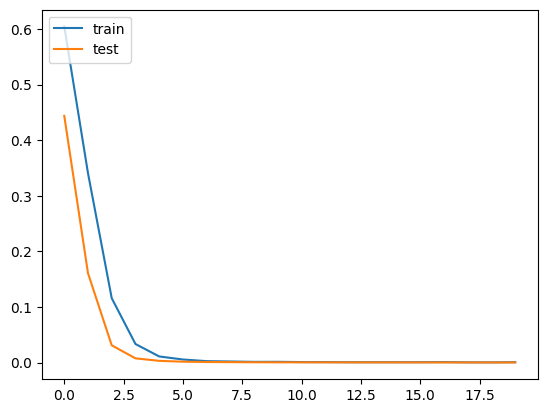

In [ ]:
#plotting loss
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')